In [1]:
import tensorflow as tf

In [2]:
tf.test.is_gpu_available()

True

In [3]:
print('version:{}'.format(tf.__version__))

version:2.0.0-rc0


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pathlib
import random
import IPython.display as display

In [5]:
data_dir = 'E:\\study\\tensorflow\\data\\2_class'

In [6]:
data_root = pathlib.Path(data_dir)

data_root

WindowsPath('E:/study/tensorflow/data/2_class')

In [7]:
for item in data_root.iterdir():
    print(item)

E:\study\tensorflow\data\2_class\airplane
E:\study\tensorflow\data\2_class\lake


In [8]:
all_image_path = list(data_root.glob('*/*'))

In [9]:
len(all_image_path)

1400

In [10]:
all_image_path[:3]

[WindowsPath('E:/study/tensorflow/data/2_class/airplane/airplane_001.jpg'),
 WindowsPath('E:/study/tensorflow/data/2_class/airplane/airplane_002.jpg'),
 WindowsPath('E:/study/tensorflow/data/2_class/airplane/airplane_003.jpg')]

In [11]:
all_image_path[-3:]

[WindowsPath('E:/study/tensorflow/data/2_class/lake/lake_698.jpg'),
 WindowsPath('E:/study/tensorflow/data/2_class/lake/lake_699.jpg'),
 WindowsPath('E:/study/tensorflow/data/2_class/lake/lake_700.jpg')]

In [12]:
all_image_path = [str(path) for path in all_image_path]

In [13]:
all_image_path[10:12]

['E:\\study\\tensorflow\\data\\2_class\\airplane\\airplane_011.jpg',
 'E:\\study\\tensorflow\\data\\2_class\\airplane\\airplane_012.jpg']

In [14]:
random.shuffle(all_image_path)

In [15]:
all_image_path[:5]

['E:\\study\\tensorflow\\data\\2_class\\lake\\lake_680.jpg',
 'E:\\study\\tensorflow\\data\\2_class\\airplane\\airplane_065.jpg',
 'E:\\study\\tensorflow\\data\\2_class\\airplane\\airplane_341.jpg',
 'E:\\study\\tensorflow\\data\\2_class\\lake\\lake_078.jpg',
 'E:\\study\\tensorflow\\data\\2_class\\lake\\lake_489.jpg']

In [16]:
image_count = len(all_image_path)

In [17]:
image_count

1400

In [18]:
label_names = sorted(item.name for item in data_root.glob('*/'))

In [19]:
label_names

['airplane', 'lake']

In [20]:
label_to_index = dict((name,index) for index,name in enumerate(label_names))

In [21]:
label_to_index

{'airplane': 0, 'lake': 1}

In [22]:
pathlib.Path('E:\\study\\tensorflow\\data\\2_class\\airplane\\airplane_012.jpg').parent.name

'airplane'

In [23]:
all_image_label = [label_to_index[pathlib.Path(p).parent.name] for p in all_image_path]

In [24]:
all_image_label[:5]

[1, 0, 0, 1, 1]

In [25]:
index_to_label = dict((v,k) for k,v in label_to_index.items())

In [26]:
index_to_label

{0: 'airplane', 1: 'lake'}

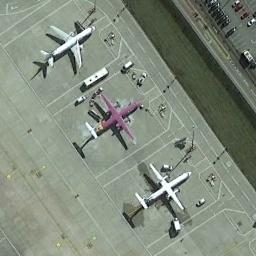

airplane


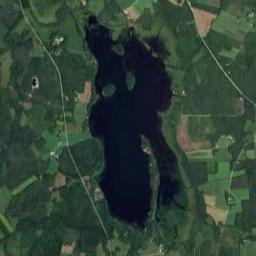

lake


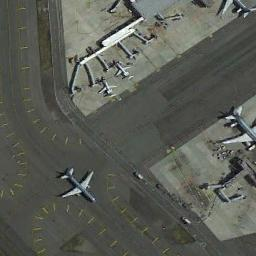

airplane


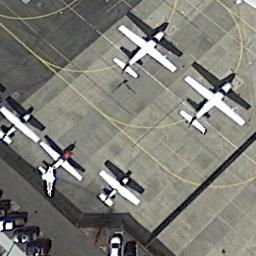

airplane


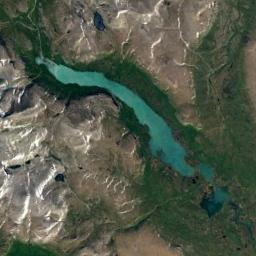

lake


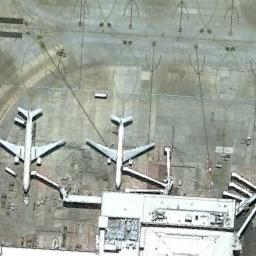

airplane


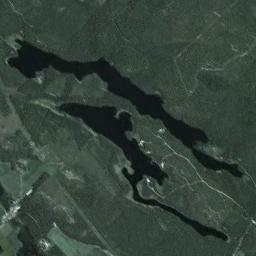

lake


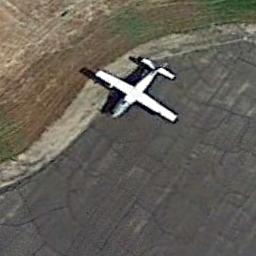

airplane


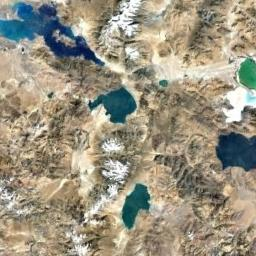

lake


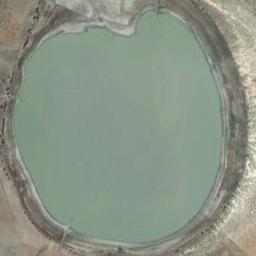

lake


In [59]:
for n in range(10):
    image_index = random.choice(range(len(all_image_path)))
    display.display(display.Image(all_image_path[image_index]))
    print(index_to_label[all_image_label[image_index]])

In [28]:
img_path = all_image_path[10]

In [29]:
img_raw = tf.io.read_file(img_path)

In [60]:
img_tensor = tf.image.decode_jpeg(img_raw,channels=3)

In [61]:
img_tensor.shape

TensorShape([256, 256, 3])

In [62]:
img_tensor.dtype

tf.uint8

In [63]:
img_tensor = tf.cast(img_tensor,tf.float32)

In [64]:
img_tensor = img_tensor/255

In [65]:
img_tensor.numpy().max()

0.7764706

In [66]:
img_tensor.numpy().min()

0.0

In [67]:
def load_preprosess_image(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img,channels=3)#=3代表解析彩色图片
    img = tf.image.resize(img,[256,256])
    img = tf.cast(img,tf.float32)
    img = img/255.0
    return img

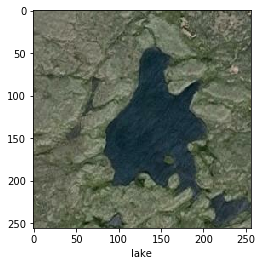

In [72]:
def caption_image(label):
    return {0: 'airplane', 1: 'lake'}.get(label)

image_path = all_image_path[0]
label = all_image_label[0]

plt.imshow(load_preprosess_image(img_path))
plt.grid(False)
plt.xlabel(caption_image(label))
print()

In [68]:
image_path = all_image_path[110]

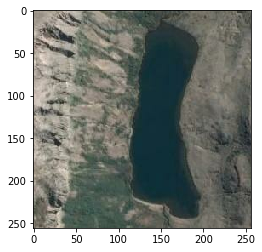

In [69]:
plt.imshow(load_preprosess_image(image_path))

In [41]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_path)

In [42]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
image_ds = path_ds.map(load_preprosess_image, num_parallel_calls=AUTOTUNE)

In [43]:
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(all_image_label, tf.int64))

In [44]:
for label in label_ds.take(10):
    print(label_names[label.numpy()])

lake
airplane
airplane
lake
lake
lake
lake
lake
lake
airplane


In [45]:
for i in image_ds.take(10):
    print(i.numpy())

[[[0.14117648 0.20392157 0.16470589]
  [0.12941177 0.19215687 0.15294118]
  [0.12941177 0.18039216 0.14117648]
  ...
  [0.21960784 0.26666668 0.22745098]
  [0.20784314 0.2509804  0.21960784]
  [0.19215687 0.23529412 0.20392157]]

 [[0.12156863 0.18431373 0.14509805]
  [0.12156863 0.18431373 0.14509805]
  [0.12941177 0.18039216 0.14117648]
  ...
  [0.2        0.24705882 0.20784314]
  [0.20784314 0.2509804  0.21960784]
  [0.20784314 0.2509804  0.21960784]]

 [[0.11764706 0.18039216 0.14117648]
  [0.1254902  0.1882353  0.14901961]
  [0.13725491 0.1882353  0.14901961]
  ...
  [0.14509805 0.19215687 0.15294118]
  [0.16078432 0.20392157 0.17254902]
  [0.17254902 0.21568628 0.18431373]]

 ...

 [[0.19215687 0.23921569 0.18431373]
  [0.18039216 0.22745098 0.17254902]
  [0.17254902 0.21960784 0.16470589]
  ...
  [0.13725491 0.18431373 0.14509805]
  [0.13725491 0.18039216 0.14901961]
  [0.14901961 0.19215687 0.16078432]]

 [[0.19215687 0.23921569 0.18431373]
  [0.18431373 0.23137255 0.1764706 ]


In [46]:
image_label_ds = tf.data.Dataset.zip((image_ds,label_ds))

In [47]:
image_label_ds

<ZipDataset shapes: ((256, 256, 3), ()), types: (tf.float32, tf.int64)>

In [48]:
test_count = int(image_count*0.2)

In [49]:
train_count = image_count - test_count

In [50]:
test_count,train_count

(280, 1120)

In [51]:
train_data = image_label_ds.skip(test_count)

In [52]:
test_data = image_label_ds.take(test_count)

In [53]:
BATCH_SIZE = 32

In [54]:
train_data = train_data.shuffle(buffer_size=train_count).batch(BATCH_SIZE)
# train_data = train_data.apply(
#   tf.data.experimental.shuffle_and_repeat(buffer_size=train_count))
# train_data = train_data.batch(BATCH_SIZE)
# train_data = train_data.prefetch(buffer_size=AUTOTUNE)
# train_data

In [55]:
test_data = test_data.batch(BATCH_SIZE)

In [58]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64,(3,3),input_shape = (256,256,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation='relu')

model.add(tf.keras.layers.Conv2D(64,(3,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation='relu')

model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(128,(3,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation='relu')
model.add(tf.keras.layers.Conv2D(128,(3,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation='relu')

model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(256,(3,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation='relu')
model.add(tf.keras.layers.Conv2D(256,(3,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation='relu')
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(512,(3,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation='relu')
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(512,(3,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation='relu')
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(1024,(3,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation='relu')
model.add(tf.keras.layers.GlobalAveragePooling2D())

model.add(tf.keras.layers.Dense(1024))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation='relu')

model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation='relu')

model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

SyntaxError: keyword can't be an expression (<ipython-input-58-98d7e1d15cbf>, line 4)

In [57]:
model.summary()

NameError: name 'model' is not defined

In [261]:
model.compile(optimizer='adam',
#              loss='sparse_categorical_crossentropy',
              loss='binary_crossentropy',
             metrics=['acc'])

In [262]:
steps_per_epoch = train_count//BATCH_SIZE
validation_steps = test_count//BATCH_SIZE

In [263]:
steps_per_epoch,validation_steps

(35, 8)

In [265]:
history = model.fit(train_data,
                    epochs=30,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=test_data,
                   validation_steps=validation_steps)

Train for 35 steps, validate for 8 steps
Epoch 1/30
 1/35 [..............................] - ETA: 0s

TypeError: An op outside of the function building code is being passed
a "Graph" tensor. It is possible to have Graph tensors
leak out of the function building context by including a
tf.init_scope in your function building code.
For example, the following function will fail:
  @tf.function
  def has_init_scope():
    my_constant = tf.constant(1.)
    with tf.init_scope():
      added = my_constant * 2
The graph tensor has name: :0

In [ ]:
history.history.keys()

In [ ]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()

In [ ]:
plt.plot(history.epoch, history.history.get('loss'),label='loss')
plt.plot(history.epoch,history.history.history('val_loss'),label='val_loss')
plt.legend()